## Game of Life Rules

1. Any live cell with fewer that two live neighbors dies, as if by underpopulation
2. Any live cell with two or three neighbors lives on to the next generation
3. Any live cell with more than three live neighbors dies, as if by overpopulation
4. Any dead cell with exactly three live nieghbors becomes a live cell, as if by roproduction

### TO DO
    * Setup grid
    * Create rules as functions, make sure they read all cells at the same time
    * Save images per step
    * Create an animation out of saved images

In [9]:
# Grid setup of the system
N = 10
grid = rand(0:1,N,N)

10×10 Matrix{Int64}:
 0  1  1  1  1  0  1  0  0  0
 1  0  0  1  0  0  0  0  1  0
 0  0  1  1  1  1  0  1  0  1
 1  1  0  1  0  0  1  1  0  0
 0  0  1  1  0  0  0  0  1  0
 0  0  1  1  0  0  1  0  0  0
 0  0  0  1  0  1  0  1  1  1
 0  0  1  0  0  1  1  1  1  0
 0  0  1  1  1  0  0  0  1  0
 0  1  1  0  0  0  1  1  0  1

In [12]:
N

10

In [26]:
function neighborSum(xcoord,ycoord)
    right = xcoord + 1
    if right > N
        right = 1
    end
    left = xcoord - 1
    if left === 0
        left = N
    end
    up = ycoord + 1
    if up > N
        up = 1
    end
    down = ycoord - 1
    if down === 0
        down = N
    end
    return grid[xcoord,ycoord] + grid[right,ycoord] + grid[left,ycoord] + grid[xcoord,up] + grid[xcoord,down] + grid[right,up] + grid[right,down] + grid[left,up] + grid[left,down]
end

neighborSum (generic function with 1 method)

In [30]:
nextGrid = zeros(Int64, N,N)

10×10 Matrix{Int64}:
 0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0

In [31]:
for i = 1:N
    for j = 1:N
        check = neighborSum(i,j)
        if grid[i,j] === 1
            if check < 2 || check > 3
                nextGrid[i,j] = 0
            end
            if check === 2 || check === 3
                nextGrid[i,j] = 1
            end
        end
        if grid[i,j] === 0
            if check === 3
                nextGrid[i,j] = 1
            end
        end
    end
end     

In [32]:
nextGrid

10×10 Matrix{Int64}:
 0  0  0  0  1  1  1  0  1  1
 1  0  0  0  0  0  1  1  1  1
 0  0  0  0  0  1  0  0  0  0
 1  0  0  0  0  1  0  0  0  1
 0  0  0  0  1  0  1  0  1  0
 0  0  0  0  0  0  1  0  0  1
 0  0  0  0  0  0  0  0  0  1
 0  0  0  0  0  0  0  0  0  0
 0  0  0  0  1  0  0  0  0  1
 1  0  0  0  0  0  1  0  1  1

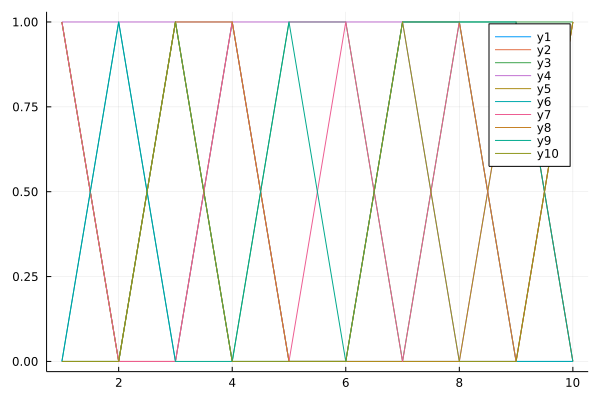

In [35]:
using Plots
plot(grid)